<a href="https://colab.research.google.com/github/sekheng/MachineLearningOnStocks/blob/main/StocksTheBestSavingAccount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is Stocks (E.g. Tesla) and Cryptocurrency the best Saving account?

Everyone wants to be safe with their money by putting their money in a POSB saving accounts but they always waste their money on unnecessary stuff such as the latest fashion or technology.

Putting money in the stock market is almost the same because the market can crash anytime and it seems too dangerous to be putting all of the eggs in one basket.

What if I tell you that putting your money into stocks and cryptocurrency is actually safer if not earns you more money than hoping that your money can grow in your saving accounts?

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from matplotlib.dates import DateFormatter
sb.set() # set the default Seaborn style for graphics
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
degree = 4

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import pandas_datareader as web
import datetime as dt
import plotly.graph_objects as go

In [ ]:
def regressionPolyCal(deltaDays, Data, DataString):
    #Polynomial Regression modelling
    linreg = LinearRegression()
    polyreg = PolynomialFeatures(degree)
    X_train, X_test, y_train, y_test = train_test_split(deltaDays, Data, train_size = 0.8, random_state = 55, shuffle = True)
    polyreg.fit_transform(X_train)
    
    modelo = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    modelo = make_pipeline(polyreg, linreg)
    modelo.fit(X_train, y_train)
    
    polycoef = modelo.steps[1][1].coef_
    polyintercept = modelo.steps[1][1].intercept_

    # Formula for the Regression line
    regline_x = deltaDays
    regline_y = polyintercept
    
    for x in range(0, degree + 1):
        regline_y = regline_y + polycoef[0][x] * (deltaDays ** x)

    # Predict Total values corresponding to deltadays
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    # Plot the Linear Regression line for train data
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    axes.scatter(X_train, y_train, color = "blue")
    axes.plot(regline_x, regline_y, 'r-', linewidth = 3, color = "red")
    axes.set_xlabel("Days Elapsed")
    axes.set_ylabel(DataString)
    plt.title("Train Set")
    plt.show()

    # Plot the Linear Regression line for test data
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    axes.scatter(X_test, y_test, color = "blue")
    axes.plot(regline_x, regline_y, 'w-', linewidth = 3, color = "red")
    axes.set_xlabel("Days Elapsed")
    axes.set_ylabel(DataString)
    plt.title("Test Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", modelo.score(X_train, y_train))
    print("Root Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred, squared = False))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", modelo.score(X_test, y_test))
    print("Root Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred, squared = False))
    print()
    return modelo

In [ ]:
def CollateGrowth(regression, data, deltaDays):
    amount_of_money = 10000
    numberOfDays = 10
    polycoef = regression.steps[1][1].coef_
    GrowRate = polycoef[0] / data
    compoundInterest = []
    compoundInterest.append(amount_of_money)
    # we are starting from next year
    for num in range(1, numberOfDays + 1):
        Growth = 0
        for x in range(0, degree + 1):
            Growth = Growth + GrowRate[x] * ((deltaDays + num) ** x) - GrowRate[x] * (deltaDays ** x)
        compoundInterest.append(amount_of_money + amount_of_money * Growth)
    for num in range(0, numberOfDays + 1):
        compoundInterest[num] = compoundInterest[num] - amount_of_money
    return compoundInterest

# Is it more worth it to put your money into saving account?
We will be exploring how much money we will be earning by putting $10000 into saving accounts.

Projection into the far future of 10 year is too much for machine learning to handle. So we can only do it for 10 days only. So from an annual interest rate of 0.05% to daily interest rate of 0.0001%
 
Where we get our calculation: https://calculate.onl/convert-annual-interest-rates/

Reference:
[POSB savings account link](https://singapore.financialadvisory.com/savings-accounts/posb/ )

In [ ]:
amount_of_money = 10000
numberOfDays = 10
interestRate = 0.0001
compoundInterest = []
compoundInterest.append(amount_of_money)
# we are starting from next year
for num in range(1, numberOfDays + 1):
  compoundInterest.append(compoundInterest[num - 1] + (compoundInterest[num - 1] * interestRate))
for num in range(0, numberOfDays + 1):
  compoundInterest[num] = compoundInterest[num] - amount_of_money
compoundInterest

[0,
 1.0,
 2.0000999999992928,
 3.000300009998682,
 4.000600039998972,
 5.001000100002784,
 6.001500200012742,
 7.002100350033288,
 8.002800560068863,
 9.003600840125728,
 10.004501200210143]

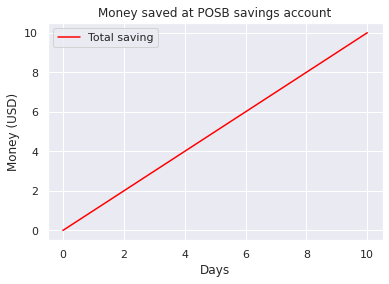

In [ ]:
# begin plotting here
fig, ax = plt.subplots()
ax.plot(compoundInterest, color = 'Red', label = 'Total saving')
plt.title('Money saved at POSB savings account')
plt.xlabel('Days')
plt.ylabel('Money (USD)')
ax.legend()
# have to flip otherwise it will just get messed up
plt.show()

*To note: the y-axis is added by another USD 10000*

An estimation of earning just $1 everyday, this is hardly enough for a meal!

# Estimating Money earned on Stocks and Cryptocurrency with Machine Learning

Given the volatility of the stock market, we will not simply use an estimation to guess how much money earned with USD 10000. But using Machine Learning to predict the volatility of the market and simulate how much you can earn with USD 10000.

There is so many stocks and cryptocurrency to choose from so to pick a suitable stocks, we need to find a correlation between these stocks then we can invest accordingly. 

# Cryptocurrency

In [ ]:
# Import dataset
testDataSetX1 = pd.read_csv('https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=CNY&outputsize=full&apikey=T6VBMOABZ84QELY9&datatype=csv')
testDataSetX2 = pd.read_csv('https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LTC&market=CNY&outputsize=full&apikey=T6VBMOABZ84QELY9&datatype=csv')
testDataSetX3 = pd.read_csv('https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=CNY&outputsize=full&apikey=T6VBMOABZ84QELY9&datatype=csv')

In [ ]:
# Process Dataset for crytocurrency
timeStamp = pd.DataFrame(testDataSetX1["timestamp"])
timeStamp = timeStamp.apply(pd.to_datetime)
colData = pd.DataFrame(testDataSetX1['close (USD)'])
colData2 = pd.DataFrame(testDataSetX2['close (USD)'])
colData3 = pd.DataFrame(testDataSetX3['close (USD)'])
Merge_Data = pd.concat([timeStamp,colData, colData2, colData3], axis=1, keys=['timestamp','BTC','LTC','ETH'])
deltaDaysElapsed = (Merge_Data['timestamp'] - Merge_Data['timestamp'].min()).astype('timedelta64[D]')

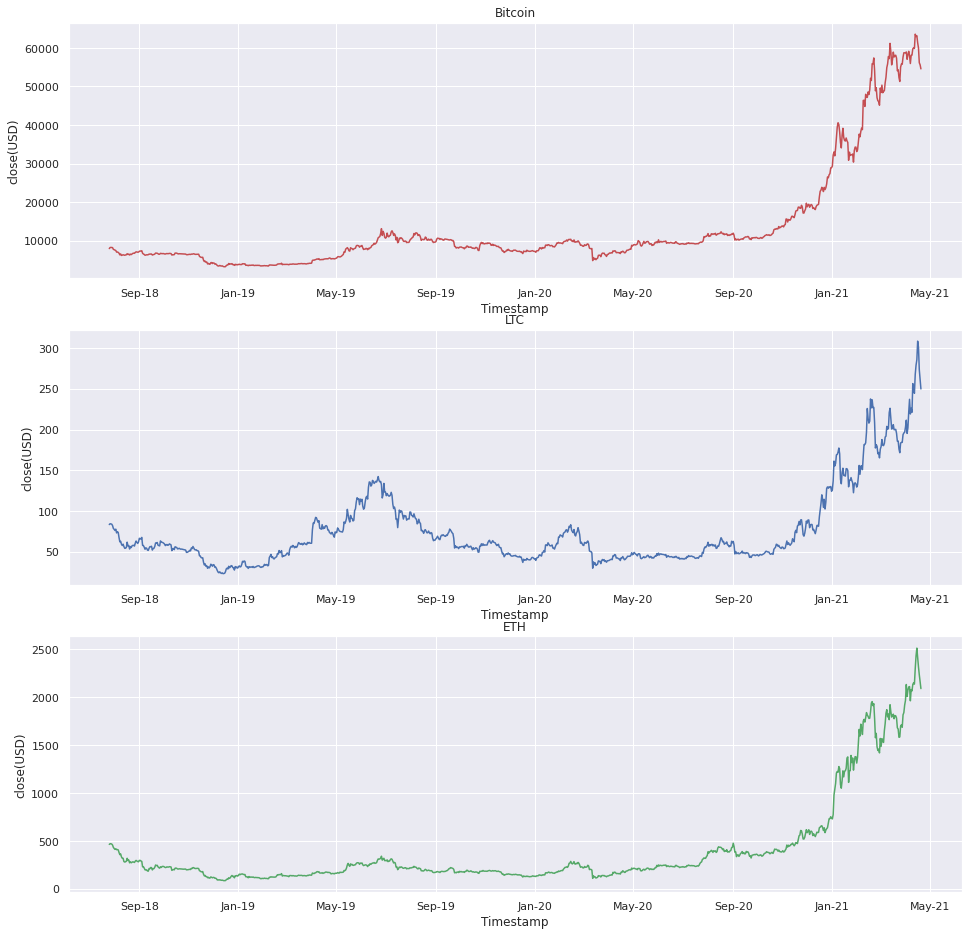

In [ ]:
#plt.xlim('2018-06-01 00:00:00','2021-04-01 00:00:00') #limit time axis
#myFmt = DateFormatter("%b-%Y")
myFmt = DateFormatter("%b-%y")

f = plt.figure(figsize=(16, 16))
ax = f.add_subplot(311)
ax.title.set_text('Bitcoin')
plt.xlabel("Timestamp");
plt.ylabel("close(USD)");
plt.gca().xaxis.set_major_formatter(myFmt)

ax2 = f.add_subplot(312)
ax2.title.set_text('LTC')
plt.xlabel("Timestamp");
plt.ylabel("close(USD)");
plt.gca().xaxis.set_major_formatter(myFmt)

ax3 = f.add_subplot(313)
ax3.title.set_text('ETH')
plt.xlabel("Timestamp");
plt.ylabel("close(USD)");
plt.gca().xaxis.set_major_formatter(myFmt)

ax.plot(Merge_Data['timestamp'], Merge_Data['BTC'], 'r')
ax2.plot(Merge_Data['timestamp'], Merge_Data['LTC'], 'b')
ax3.plot(Merge_Data['timestamp'], Merge_Data['ETH'], 'g')

plt.show()

## Heat Map for crytocurrencies

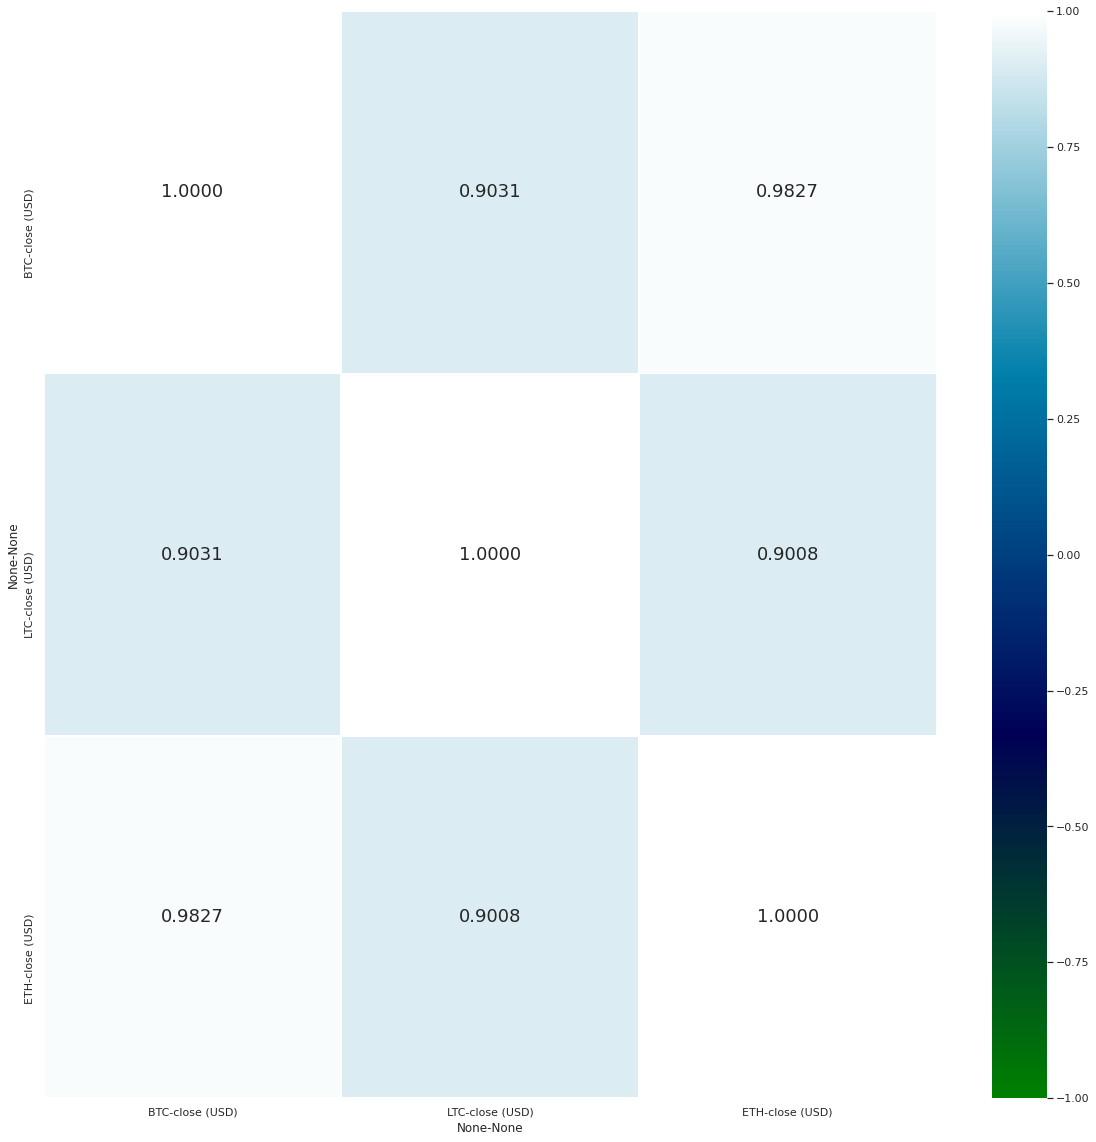

In [ ]:
# Output heatmap for correlation
f = plt.figure(figsize=(20, 20))
sb.heatmap(Merge_Data.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".4f", annot_kws = {"size": 18}, cmap = "ocean")

## Linear Regression for Cryptocurrency

#### Comparison of growth in savings account vs investment in crytocurrency(Based on overall performance of crytocurrency)

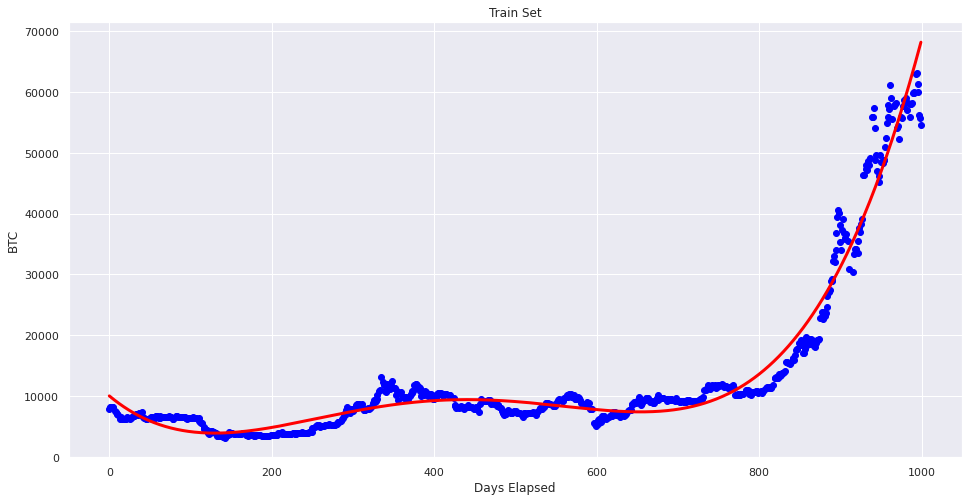

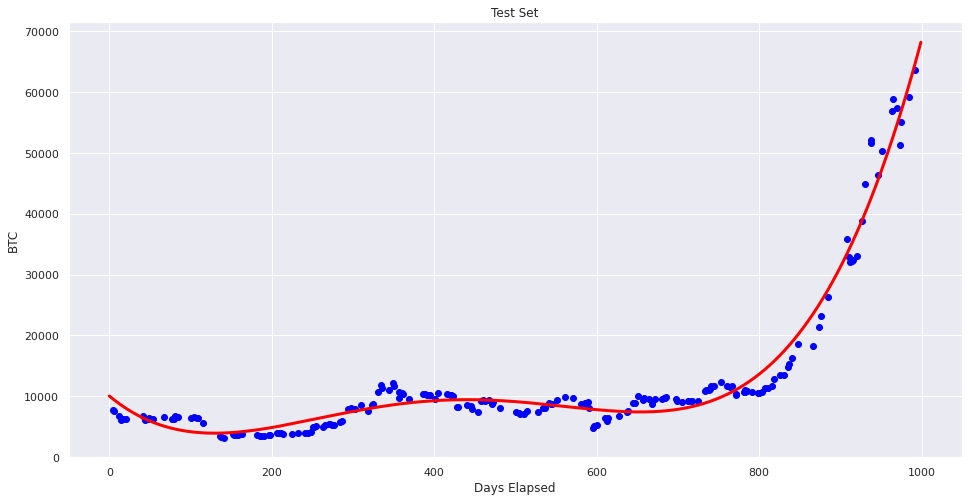

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9654029342322659
Root Mean Squared Error (MSE) 	: 2502.5354644223075

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.969298542350132
Root Mean Squared Error (MSE) 	: 2133.12887950288



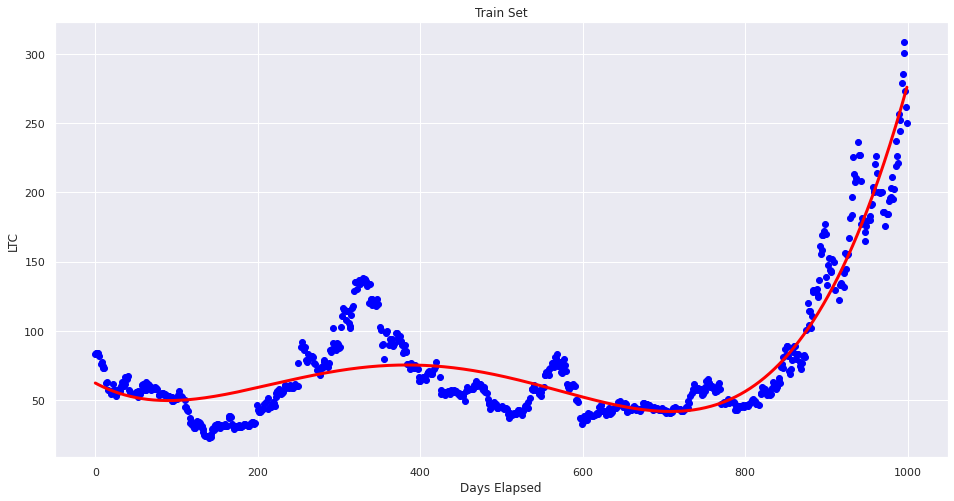

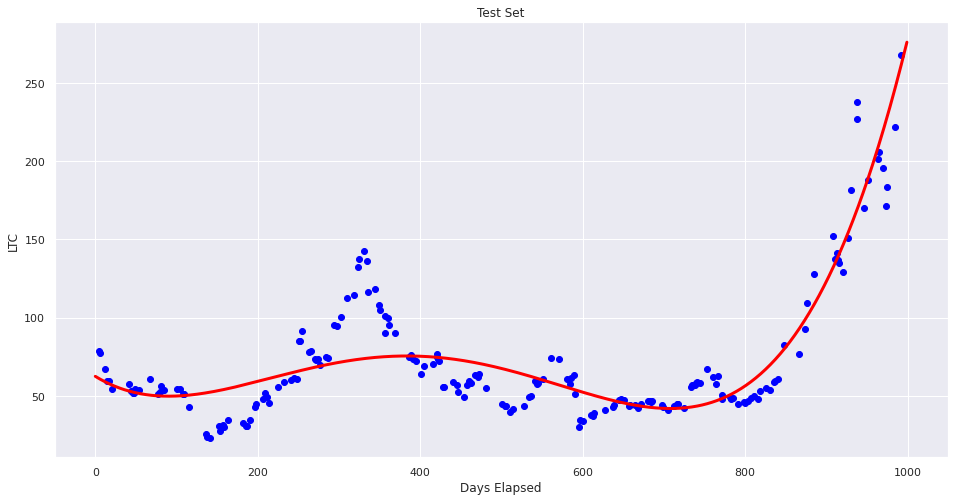

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8391366237663117
Root Mean Squared Error (MSE) 	: 19.393332867560606

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8097879571699463
Root Mean Squared Error (MSE) 	: 18.895969322333936



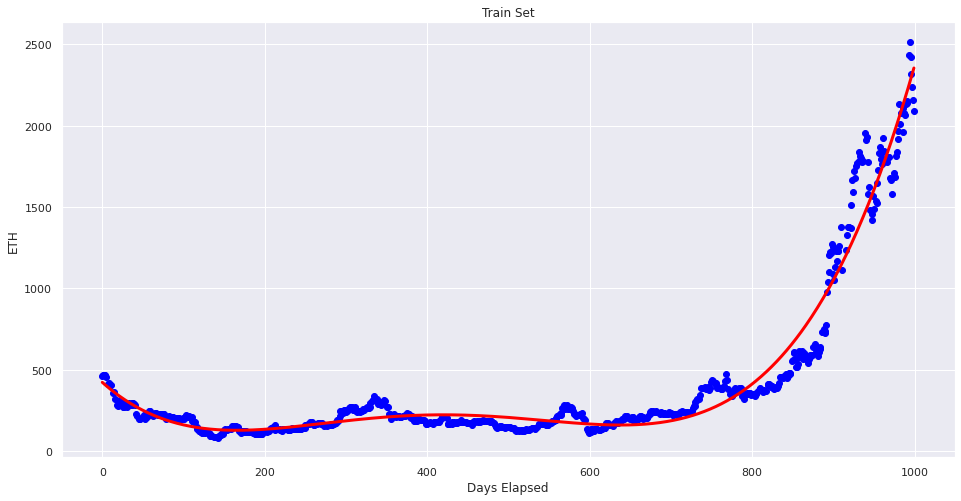

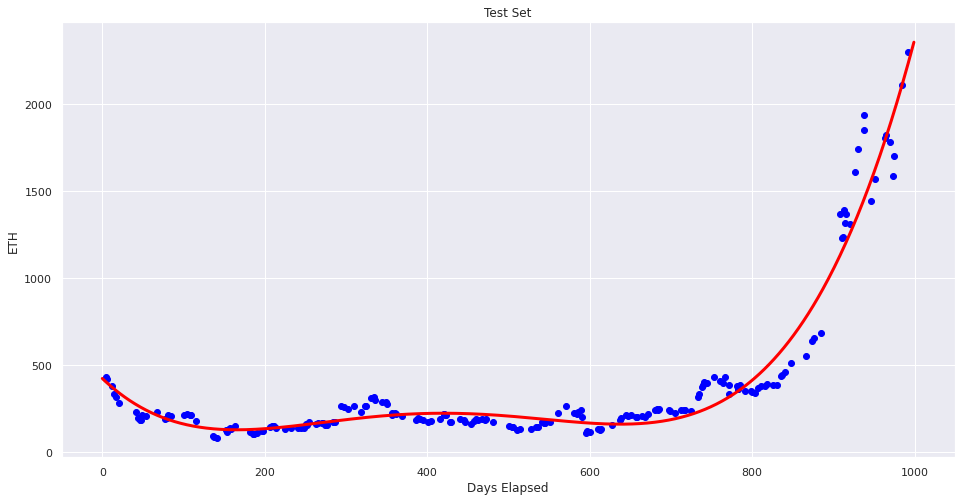

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9584955185916786
Root Mean Squared Error (MSE) 	: 97.86424010100662

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9530340665655506
Root Mean Squared Error (MSE) 	: 95.04119957107493



In [ ]:
regression = regressionPolyCal(deltaDaysElapsed, Merge_Data['BTC'], 'BTC')
regression2 = regressionPolyCal(deltaDaysElapsed, Merge_Data['LTC'], 'LTC')
regression3 = regressionPolyCal(deltaDaysElapsed, Merge_Data['ETH'], 'ETH')

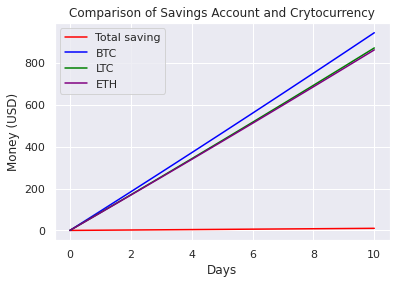

In [ ]:
fig, ax = plt.subplots()
ax.plot(compoundInterest, color = 'Red', label = 'Total saving')
ax.plot(CollateGrowth(regression, colData.iloc[0,0], deltaDaysElapsed.iloc[0,0]), color = 'Blue', label = 'BTC')
ax.plot(CollateGrowth(regression2, colData2.iloc[0,0], deltaDaysElapsed.iloc[0,0]), color = 'Green', label = 'LTC')
ax.plot(CollateGrowth(regression3, colData3.iloc[0,0], deltaDaysElapsed.iloc[0,0]), color = 'Purple', label = 'ETH')
plt.title('Comparison of Savings Account and Crytocurrency')
plt.xlabel('Days')
plt.ylabel('Money (USD)')
ax.legend()
plt.show()

# Stocks

In [ ]:
# we will be defining the functions here for easy access and from here, we can easily do it for multiple stocks
def ExtractDataFromYahooFinance(_ticker, _startDate = dt.datetime(2010, 6, 29), _endDate = None):
  ext_data = web.DataReader(_ticker, 'yahoo', _startDate, _endDate)
  # remove the date time from index column
  ext_data.reset_index(inplace=True)
  return ext_data

# as different data has different scaling to them
def GetStandardScalerForStocks(_trainingData):
  scaler = StandardScaler()
  scaler = scaler.fit(_trainingData)
  return scaler

# Number of past days we want to use to predict the future  
n_past = 60
# ensure x and y data is being standar
# can also be used for test data
def GetTrainedX_Y(_scaler, _trainingData):
  #getting the scaled data
  df_for_training_scaled = _scaler.transform(_trainingData)
  #As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
  trainX = []
  trainY = []
  # hardcoded values for now
  n_future = 1   # Number of days we want to predict into the future
  for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:_trainingData.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
  return np.array(trainX), np.array(trainY)

# In order to ensure the same regression model is being used for everything
def GetRegressionModel(_trainX, _trainY):
  # Initialising the RNN
  model = Sequential()
  model.add(LSTM(50, input_shape=(_trainX.shape[1], _trainX.shape[2]), return_sequences=True))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  # For MOAR Accuracy
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(_trainY.shape[1]))
  model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
  return model

def GetPredictedData(_trainingData, _model, _scaler):
  simulatedTraining = _model.predict(_trainingData)
  simulatedTrainingCopies = np.repeat(simulatedTraining, _trainingData.shape[2], axis=1)
  return _scaler.inverse_transform(simulatedTrainingCopies)

# Correlation between TSLA and other stocks
First we will identify the correlation between these popular stocks in order to pick the stocks we need to invest

Source: https://medium.com/analytics-vidhya/how-to-create-a-stock-correlation-matrix-in-python-4f32f8cb5b50

In [ ]:
stocksToSee = ['AAPL', 'F', 'TWTR', 'FB', 'AMZN', 'GOOGL', 'TSLA', 'PYPL', 'GM']
stockData = []
endDate = dt.datetime(2021,4,16)
for tickerSymbol in stocksToSee:
  data = ExtractDataFromYahooFinance(tickerSymbol,  _startDate=dt.datetime(2016,4,1), _endDate = endDate)
  data['Symbol'] = tickerSymbol
  stockData.append(data)
stockDF = pd.concat(stockData)
closedstockDF = stockDF[['Date', 'Close', 'Symbol']]
stockdf_pivot = closedstockDF.pivot('Date','Symbol','Close')
stockdf_pivot.head()

Symbol,AAPL,AMZN,F,FB,GM,GOOGL,PYPL,TSLA,TWTR
Date,,,,,,,,,
2016-04-01,27.497499,598.500000,13.10,116.059998,30.469999,769.669983,39.400002,47.518002,15.980000
2016-04-04,27.780001,593.190002,12.80,112.550003,29.900000,765.119995,38.790001,49.397999,17.090000
2016-04-05,27.452499,586.140015,12.77,112.220001,29.600000,758.570007,38.549999,51.094002,17.049999
2016-04-06,27.740000,602.080017,12.82,113.709999,29.940001,768.070007,39.160000,53.084000,17.260000
2016-04-07,27.135000,591.429993,12.52,113.639999,29.420000,760.119995,38.279999,51.439999,16.980000


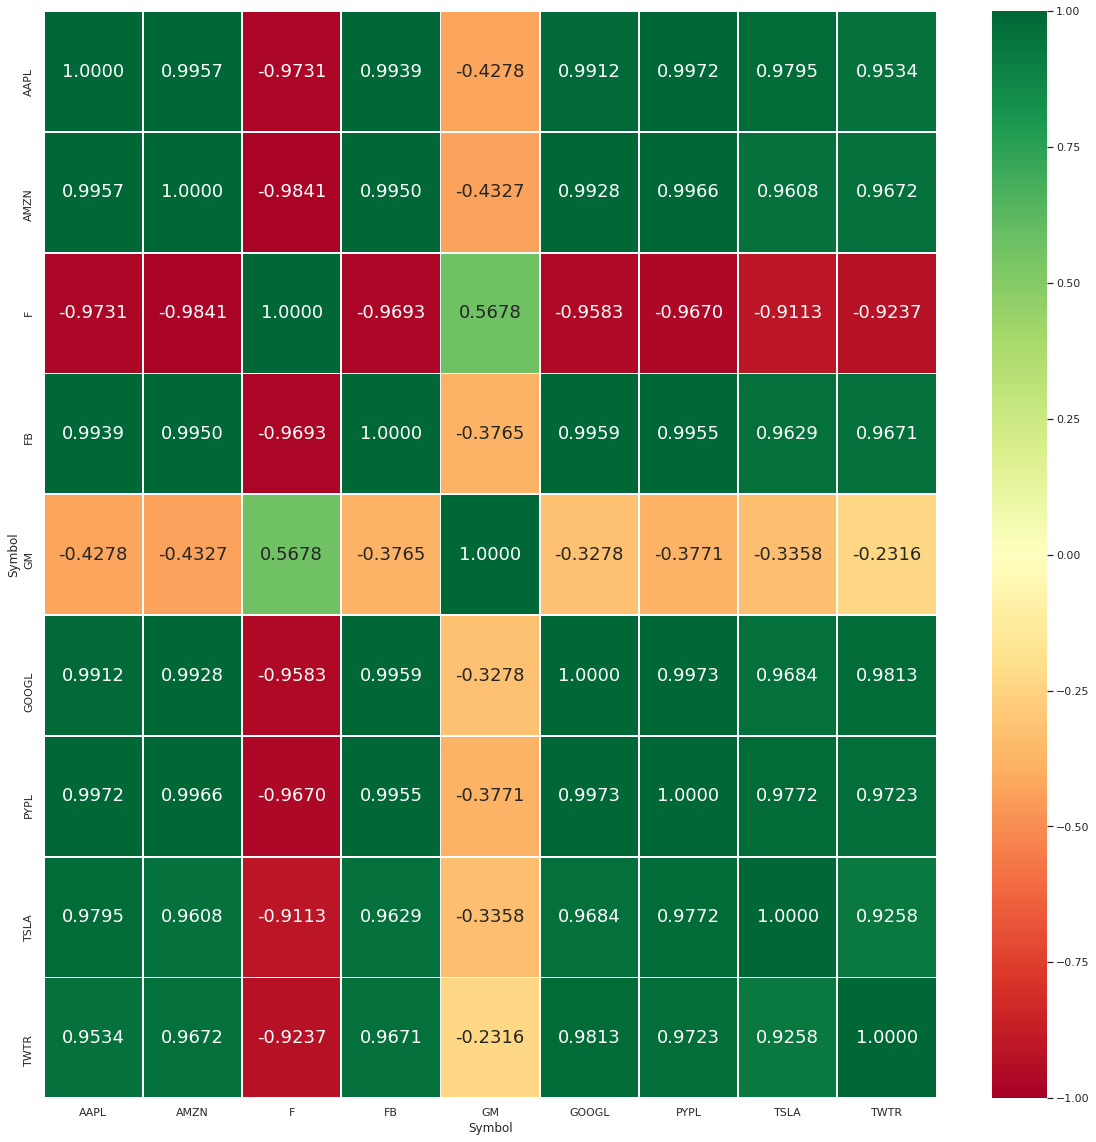

In [ ]:
corr_df = stockdf_pivot.corr(method='pearson')
f = plt.figure(figsize=(20, 20))
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
sb.heatmap(corr_df.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".4f", annot_kws = {"size": 18}, cmap = "RdYlGn")

As you can see, Tesla has a strong correlation with other technology companies such as Apple and Amazon but shares a negative or weak correlation with other automotives such as F (Ford) and GM (General Motors).

Due to Tesla's strong correlation with other tech companies, we can include these tech companies as predictors into our multivariate LSTM in order to increase the accuracy of our prediction.

However the complexity will also increase.
So we will be focusing on Tesla so as to ensure our investment will also rise together. 

# AI simulation with stocks
Simulation will be used as forecasting over the years is not accurate at all and it will not be fair in a comparison with the Saving accounts. Starting with Tesla

Neural network shall be used here so that we can create a more accurate simulation of how well the stocks are doing and to account for unexpected events. It is also fun learning TensorFlow and how to incorporate into this project. 

We will be using multivariate LTSM regressive neural network so that more data will be used and even higher can be achieved.

Source: https://www.youtube.com/watch?v=tepxdcepTbY&t=824s

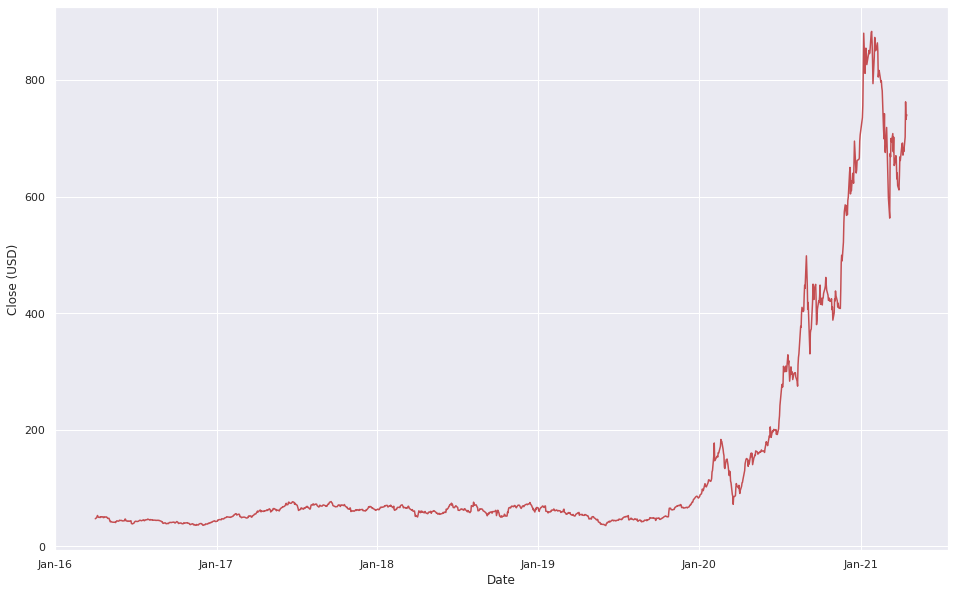

In [ ]:
teslaStocksData = stockDF[stockDF['Symbol'] == 'TSLA']
myFmt = DateFormatter("%b-%y")
fig, ax = plt.subplots(figsize = (16,10))
plt.xlabel("Date");
plt.ylabel("Close (USD)");
ax.plot(teslaStocksData['Date'], teslaStocksData['Close'], 'r')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.show()

In [ ]:
# get the dates
datePeriod = pd.to_datetime(teslaStocksData['Date'])
teslaStocksData.drop(columns=['Symbol', 'Date'], inplace=True)
teslaStocksData

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,High,Low,Open,Close,Volume,Adj Close
0,49.580002,46.650002,48.966000,47.518002,79987500.0,47.518002
1,50.424000,48.728001,49.824001,49.397999,67376500.0,49.397999
2,51.312000,48.000000,48.099998,51.094002,49743500.0,51.094002
3,53.548000,50.689999,50.793999,53.084000,58527500.0,53.084000
4,53.868000,50.902000,53.290001,51.439999,44281000.0,51.439999
...,...,...,...,...,...,...
1265,704.799988,682.090027,685.700012,701.979980,29135700.0,701.979980
1266,763.000000,710.659973,712.700012,762.320007,44652800.0,762.320007
1267,780.789978,728.030029,770.700012,732.229980,49017400.0,732.229980
1268,743.690002,721.309998,743.099976,738.849976,27848900.0,738.849976


In [ ]:
# we will be splitting up the test and training
# might as well hardcode the days since it is easier
# for first year, 2016 will be the validation data
numberOfDays = 191
tslaValidationDF = teslaStocksData.iloc[:numberOfDays]
# then for the validation DF
# hardcodeDays for 2020 period
numberOfDaysin2020 = (2* 365) + 277
# Need to make sure the data is overlapped with test data
tslaTrainDF = teslaStocksData.iloc[numberOfDays: numberOfDays + numberOfDaysin2020 - n_past]
# we are using the old data as test as we will be using the latest data later
# minus by past numbers of days so that there can be more prediction to be done accordingly
tslaTestDF = teslaStocksData.iloc[numberOfDays + numberOfDaysin2020 - n_past:]
#then we will need to access the scaler
tslaScaler = GetStandardScalerForStocks(tslaTrainDF)
# then we can get the train of x and y
tslaTrainX, tslaTrainY = GetTrainedX_Y(tslaScaler, tslaTrainDF)
# because it is using just 69 days to predict data!!!!!!! TOO SMALL
tslaTestX, tslaTestY = GetTrainedX_Y(tslaScaler, tslaTestDF)
tslaValidationX, tslaValidationY = GetTrainedX_Y(tslaScaler, tslaValidationDF)
# get the model
tslaModel = GetRegressionModel(tslaTrainX, tslaTrainY)
tslaModel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 60, 50)            11400     
_________________________________________________________________
dropout_28 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 50)               

With 2 layers, the accuracy of the model can dropped tremendously, after testing with different numbers of layers, we find that 4 layers is the best and anything more doesnt decrease the validation loss.

In [ ]:
tslaModelHistory = tslaModel.fit(tslaTrainX, tslaTrainY, epochs=30, batch_size=32, validation_data=(tslaValidationX, tslaValidationY), verbose=1)

Epoch 1/30
28/28 [==============================] - 6s 58ms/step - loss: 0.5330 - mean_squared_error: 0.5330 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2/30
28/28 [==============================] - 0s 14ms/step - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 3/30
28/28 [==============================] - 0s 14ms/step - loss: 0.0502 - mean_squared_error: 0.0502 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 4/30
28/28 [==============================] - 0s 14ms/step - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 5/30
28/28 [==============================] - 0s 15ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 6/30
28/28 [==============================] - 0s 14ms/step - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7/30
28/28 [================

Text(0, 0.5, 'Validation Loss (MSE)')

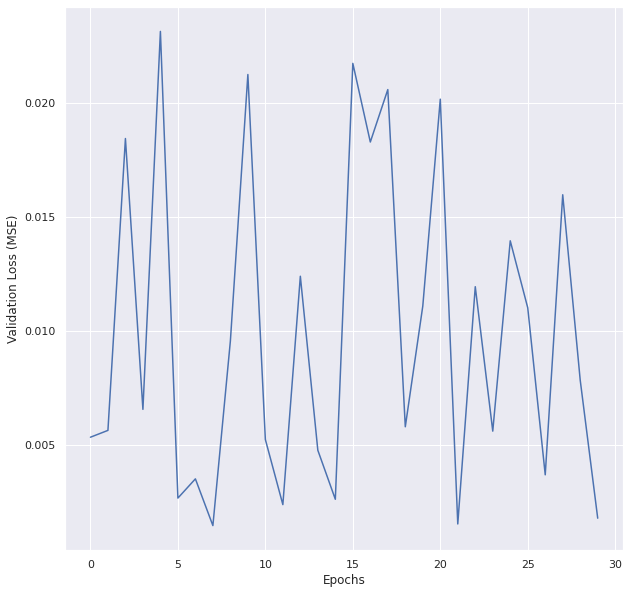

In [ ]:
# since our loss is MSE, we can plot just that to evaluate the accuracy of our model
f = plt.figure(figsize=(10, 10))
plt.plot(tslaModelHistory.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss (MSE)')

Epoch 8 and 22 has the lowest val_loss and it appears that it is trying overfit the data

Now test it against tsla test data!

TSLA test MSE:  120992.04154063611


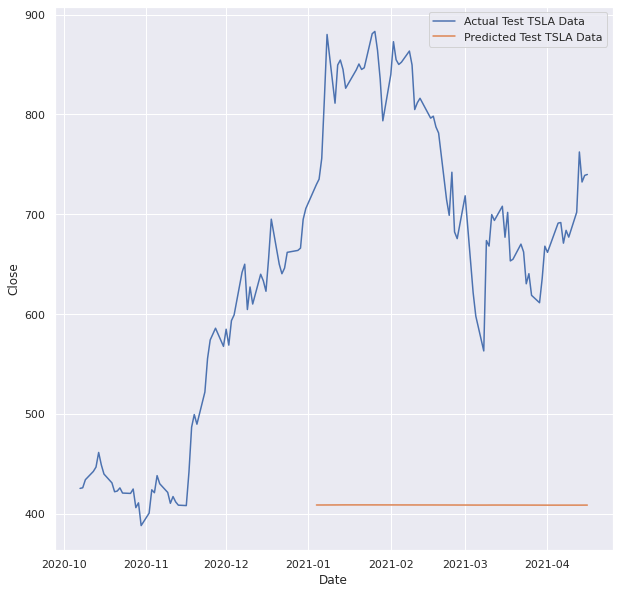

In [ ]:
y_tsla_pred_train = GetPredictedData(tslaTrainX, tslaModel, tslaScaler)
y_tsla_pred_test = GetPredictedData(tslaTestX, tslaModel, tslaScaler)
# then we start to plot the graph
# we would want to access close 
testDatePeriod = datePeriod.iloc[numberOfDays + numberOfDaysin2020 - n_past:]
trainDatePeriod = datePeriod.iloc[numberOfDays:numberOfDays + numberOfDaysin2020 - n_past]
plt.figure(figsize=(10, 10))
# plot the actual data
sb.lineplot(x = testDatePeriod, y = tslaTestDF['Close'], label='Actual Test TSLA Data')
#plot test line
sb.lineplot(x = testDatePeriod[n_past:], y = y_tsla_pred_test[:,3], label='Predicted Test TSLA Data')

#the MSE for test
print('TSLA test MSE: ', mean_squared_error(tslaTestDF['Close'].iloc[n_past:], y_tsla_pred_test[:,3]))

High MSE even though our validation loss is very low. Possibly the model couldn't deal with the exponential growth as of recent.

TSLA train MSE:  111.11976985770025


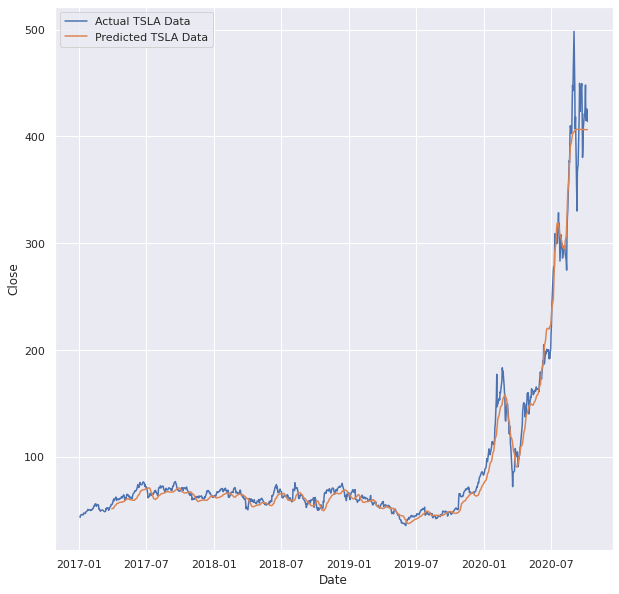

In [ ]:
plt.figure(figsize=(10, 10))
sb.lineplot(x = trainDatePeriod, y = tslaTrainDF['Close'], label='Actual TSLA Data')
sb.lineplot(x=trainDatePeriod[n_past:], y = y_tsla_pred_train[:,3], label='Predicted TSLA Data') 


print('TSLA train MSE: ', mean_squared_error(tslaTrainDF['Close'].iloc[n_past:], y_tsla_pred_train[:,3]))

Possibly caused by overfitting of data during the epochs. 

Now trying to combine the train and test prediction so as to ensure the data doesn't look too weird

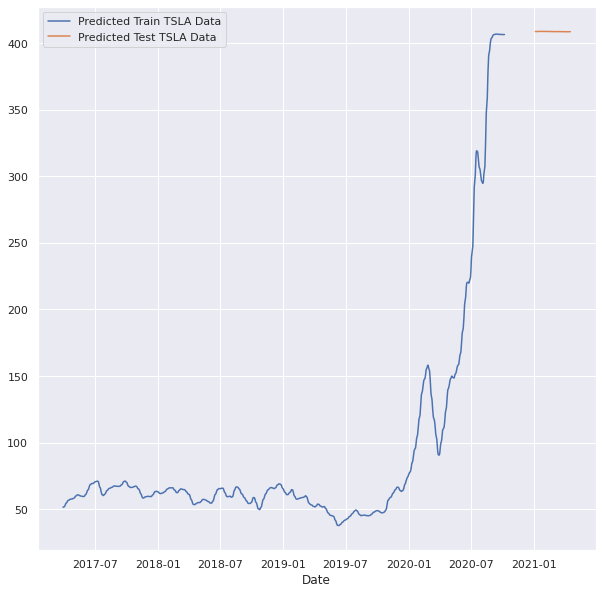

In [ ]:
plt.figure(figsize=(10, 10))
sb.lineplot(x=trainDatePeriod[n_past:], y = y_tsla_pred_train[:,3], label='Predicted Train TSLA Data') 
sb.lineplot(x = testDatePeriod[n_past:], y = y_tsla_pred_test[:,3], label='Predicted Test TSLA Data')

Then we are going to extrapolate it for another 10 days so that we can use it in our prediction against Savings Account

In [ ]:
numOfPredicts = 10
# have a copy of the test of only the recent days!
copyTest = tslaTestDF.iloc[-n_past - 1:]
for num in range(numOfPredicts):
  # get projection data
  projectX, projectY = GetTrainedX_Y(tslaScaler, copyTest)
  oneDayPrediction = GetPredictedData(projectX, tslaModel, tslaScaler)
  # then put it into copy test
  copyTest.append(oneDayPrediction.tolist())
  # but we have to constantly ensure that it will only be those amount of recent days!
  copyTest = copyTest.iloc[-n_past - 1:]

copyTest.iloc[-numOfPredicts:]

,High,Low,Open,Close,Volume,Adj Close
1260,708.159973,684.700012,707.710022,691.049988,41842800.0,691.049988
1261,696.549988,681.369995,690.299988,691.619995,28271800.0,691.619995
1262,691.380005,667.840027,687.000000,670.969971,26309400.0,670.969971
1263,689.549988,671.650024,677.380005,683.799988,23924300.0,683.799988
1264,680.969971,669.429993,677.770020,677.020020,21402600.0,677.020020
1265,704.799988,682.090027,685.700012,701.979980,29135700.0,701.979980
1266,763.000000,710.659973,712.700012,762.320007,44652800.0,762.320007
1267,780.789978,728.030029,770.700012,732.229980,49017400.0,732.229980
1268,743.690002,721.309998,743.099976,738.849976,27848900.0,738.849976
1269,749.409973,724.599976,728.650024,739.780029,27924000.0,739.780029


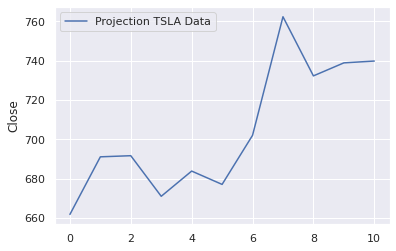

In [ ]:
# then plot the graph as it is
sb.lineplot(x = range(11), y = copyTest.iloc[-numOfPredicts - 1:, 3], label='Projection TSLA Data')

# Now spending all of $10000 equally on the selected stocks and cryptocurrency

With these simulations, we can get how much money we can earn with just USD10000.

So under the assumption that you will be investing tomorrow (Insert the Date) and wait exactly 365 days, you will be getting these amounts of money after just 1 year

# If you invest all of $10000 into Tesla

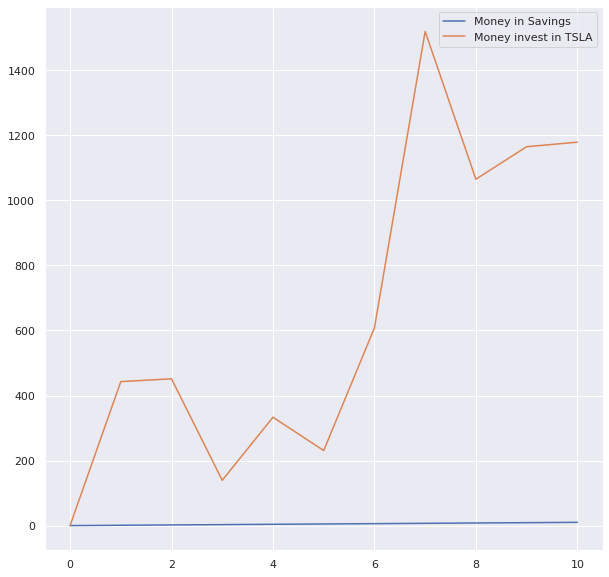

In [ ]:
# we will proceed with closed data
closedTSLAData = copyTest.iloc[-numOfPredicts - 1:, 3]
# but first, we will have to dump in 10000 into tesla stock which 
# we will use 10000 / first day of tesla stock price then we can get the amount of stocks we own
# then we use that number always be multiplied by the closed price of tesla for subsequent days 
numberOfTSLABuy = 10000 / closedTSLAData.iloc[0]
# have a new array to contain the price
amtYouEarnedOverYears = [10000]
# then through period
for num in range(1, len(closedTSLAData)):
  amtYouEarnedOverYears.append((numberOfTSLABuy * closedTSLAData.iloc[num]) - amount_of_money)
amtYouEarnedOverYears[0] = 0
# plot the saving graph
plt.figure(figsize=(10, 10))
sb.lineplot(x = range(11), y = compoundInterest, label='Money in Savings')
# then plot the tesla investment graph
sb.lineplot(x = range(11), y = amtYouEarnedOverYears, label='Money invest in TSLA')

Note: We are not accountable for any external forces that can negatively impede the stock market so please do your due diligence to research and invest wisely